In [211]:
from harris import compute_harris_interest_points, non_maxima_suppression
import matplotlib.pyplot as plt
from utils import get_gradient_magnitude_and_argument
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

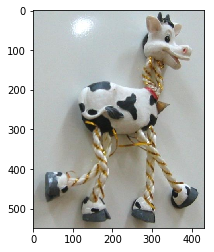

In [212]:
giraffe = plt.imread('giraffe.PNG')
plt.imshow(giraffe)

In [273]:
grey_giraffe = 0.299 * giraffe[:, :, 1] + 0.587 * giraffe[:, :, 2] + 0.114 * giraffe[:, :, 3] 
giraffe_harris = compute_harris_interest_points(grey_giraffe, harris_alpha = 0.05, blur_sigma = 1)

giraffe_harris = (giraffe_harris - giraffe_harris.min()) / (giraffe_harris.max() - giraffe_harris.min())

print(giraffe_harris.min(), giraffe_harris.max(), giraffe_harris.mean(), giraffe_harris.std())

0.0 1.0 0.189751 0.00707297


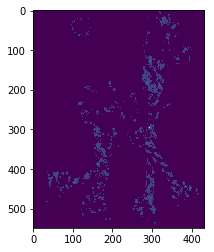

In [274]:
values, bins = np.histogram(giraffe_harris.ravel(), bins=100)
threshold = bins[np.argmax(values) + 1]

giraffe_harris[giraffe_harris < threshold] = 0

plt.imshow(giraffe_harris)

In [305]:
suppressed_harris = (suppressed_harris - suppressed_harris.min()) / (suppressed_harris.max() - suppressed_harris.min())

print(suppressed_harris.min(), suppressed_harris.max())
print(suppressed_harris.mean(), suppressed_harris.std())

print(np.sum(suppressed_harris > suppressed_harris.mean() * 45))

x, y = np.where(suppressed_harris > suppressed_harris.mean() * 45)

0.0 1.0
0.0049812 0.0314905
361


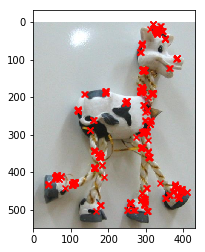

In [306]:
plt.imshow(giraffe)
plt.scatter(y, x, marker='x', c='r')

In [278]:
from harris import patch_non_maxima_suppression

(277,) (277,)


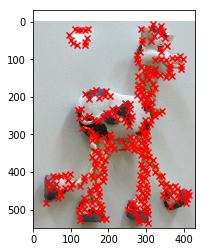

In [322]:
suppressed_giraffe = patch_non_maxima_suppression(giraffe_harris, patch_shape=(11, 11), return_coords=False)
suppressed_giraffe = (suppressed_giraffe - suppressed_giraffe.min()) / (suppressed_giraffe.max() - suppressed_giraffe.min())
x, y = np.where(suppressed_giraffe > suppressed_giraffe.mean())
print(y.shape, x.shape)
plt.imshow(giraffe)
plt.scatter(y, x, marker='x', c='r')